## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.053338  0.048111 -0.045019 -0.367387 -1.656207 -0.560135
1 -1.274132  1.383415 -0.114364  1.188047 -0.729255 -0.133088
2 -0.659720 -1.045979 -0.864435 -1.178482  1.581682 -1.150009
3 -1.692961  0.996364  1.208129  0.146610 -0.588781 -0.811261
4  0.301139 -1.039671  1.386496  0.191624 -0.089837  0.207124


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9719723	total: 46.3ms	remaining: 46.3s
1:	learn: 0.9602621	total: 46.7ms	remaining: 23.3s
2:	learn: 0.9479255	total: 47.1ms	remaining: 15.6s
3:	learn: 0.9362124	total: 47.5ms	remaining: 11.8s
4:	learn: 0.9258137	total: 47.9ms	remaining: 9.54s
5:	learn: 0.9151126	total: 48.3ms	remaining: 8s
6:	learn: 0.9041780	total: 48.6ms	remaining: 6.9s
7:	learn: 0.8954510	total: 49ms	remaining: 6.07s
8:	learn: 0.8857215	total: 49.4ms	remaining: 5.43s
9:	learn: 0.8756828	total: 49.7ms	remaining: 4.92s
10:	learn: 0.8665915	total: 50.1ms	remaining: 4.5s
11:	learn: 0.8561564	total: 50.5ms	remaining: 4.16s
12:	learn: 0.8455329	total: 50.8ms	remaining: 3.86s
13:	learn: 0.8351842	total: 51.1ms	remaining: 3.6s
14:	learn: 0.8276941	total: 51.5ms	remaining: 3.38s
15:	learn: 0.8184884	total: 51.8ms	remaining: 3.19s
16:	learn: 0.8084406	total: 52.2ms	remaining: 3.02s
17:	learn: 0.7992637	total: 52.5ms	remaining: 2.87s
18:	learn: 0.7918432	total: 52.9ms	remaining: 2.73s


201:	learn: 0.1548735	total: 120ms	remaining: 473ms
202:	learn: 0.1535632	total: 120ms	remaining: 472ms
203:	learn: 0.1521396	total: 121ms	remaining: 471ms
204:	learn: 0.1508018	total: 121ms	remaining: 469ms
205:	learn: 0.1494799	total: 121ms	remaining: 468ms
206:	learn: 0.1484871	total: 122ms	remaining: 467ms
207:	learn: 0.1472641	total: 122ms	remaining: 465ms
208:	learn: 0.1462138	total: 123ms	remaining: 464ms
209:	learn: 0.1450597	total: 123ms	remaining: 462ms
210:	learn: 0.1439253	total: 123ms	remaining: 461ms
211:	learn: 0.1428632	total: 124ms	remaining: 459ms
212:	learn: 0.1416927	total: 124ms	remaining: 458ms
213:	learn: 0.1404271	total: 124ms	remaining: 456ms
214:	learn: 0.1392609	total: 125ms	remaining: 455ms
215:	learn: 0.1380145	total: 125ms	remaining: 453ms
216:	learn: 0.1368596	total: 125ms	remaining: 452ms
217:	learn: 0.1357442	total: 126ms	remaining: 450ms
218:	learn: 0.1347745	total: 126ms	remaining: 449ms
219:	learn: 0.1336891	total: 126ms	remaining: 448ms
220:	learn: 

474:	learn: 0.0278288	total: 222ms	remaining: 245ms
475:	learn: 0.0276818	total: 222ms	remaining: 244ms
476:	learn: 0.0275328	total: 222ms	remaining: 244ms
477:	learn: 0.0273724	total: 223ms	remaining: 243ms
478:	learn: 0.0272533	total: 223ms	remaining: 243ms
479:	learn: 0.0271327	total: 224ms	remaining: 242ms
480:	learn: 0.0269241	total: 224ms	remaining: 242ms
481:	learn: 0.0268145	total: 224ms	remaining: 241ms
482:	learn: 0.0266913	total: 225ms	remaining: 240ms
483:	learn: 0.0265846	total: 225ms	remaining: 240ms
484:	learn: 0.0264823	total: 225ms	remaining: 239ms
485:	learn: 0.0262826	total: 226ms	remaining: 239ms
486:	learn: 0.0261915	total: 226ms	remaining: 238ms
487:	learn: 0.0260445	total: 227ms	remaining: 238ms
488:	learn: 0.0259262	total: 227ms	remaining: 237ms
489:	learn: 0.0258149	total: 227ms	remaining: 237ms
490:	learn: 0.0257201	total: 228ms	remaining: 236ms
491:	learn: 0.0256204	total: 228ms	remaining: 236ms
492:	learn: 0.0254808	total: 229ms	remaining: 235ms
493:	learn: 

747:	learn: 0.0086321	total: 328ms	remaining: 110ms
748:	learn: 0.0085968	total: 328ms	remaining: 110ms
749:	learn: 0.0085601	total: 329ms	remaining: 110ms
750:	learn: 0.0085543	total: 329ms	remaining: 109ms
751:	learn: 0.0085084	total: 330ms	remaining: 109ms
752:	learn: 0.0084628	total: 330ms	remaining: 108ms
753:	learn: 0.0084343	total: 330ms	remaining: 108ms
754:	learn: 0.0084285	total: 331ms	remaining: 107ms
755:	learn: 0.0083839	total: 331ms	remaining: 107ms
756:	learn: 0.0083561	total: 331ms	remaining: 106ms
757:	learn: 0.0083250	total: 332ms	remaining: 106ms
758:	learn: 0.0083193	total: 332ms	remaining: 105ms
759:	learn: 0.0083137	total: 333ms	remaining: 105ms
760:	learn: 0.0082805	total: 333ms	remaining: 105ms
761:	learn: 0.0082372	total: 333ms	remaining: 104ms
762:	learn: 0.0082314	total: 334ms	remaining: 104ms
763:	learn: 0.0081881	total: 334ms	remaining: 103ms
764:	learn: 0.0081826	total: 335ms	remaining: 103ms
765:	learn: 0.0081403	total: 335ms	remaining: 102ms
766:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

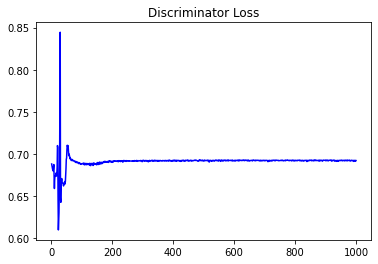

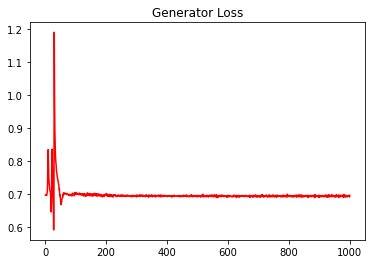

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09321521434731365


#### Sanity Checks 

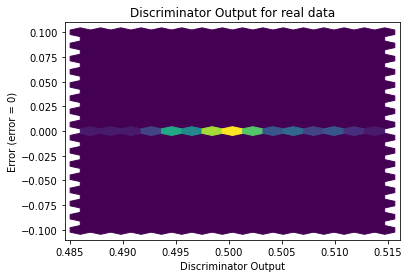

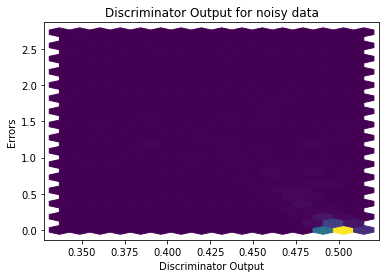

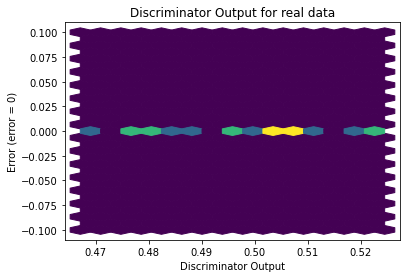

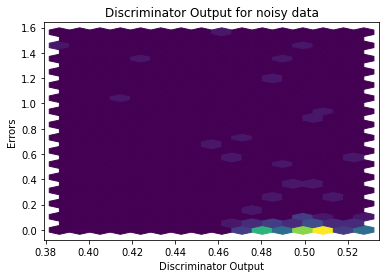

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


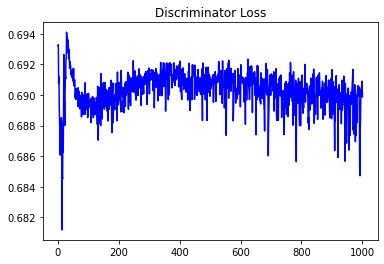

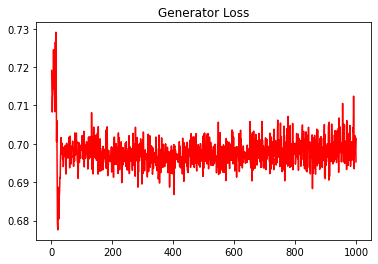

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.051202169553835136


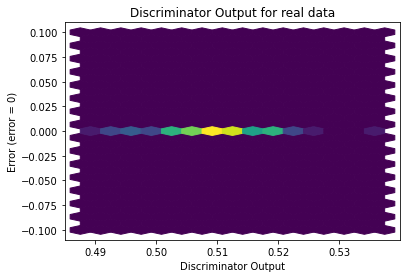

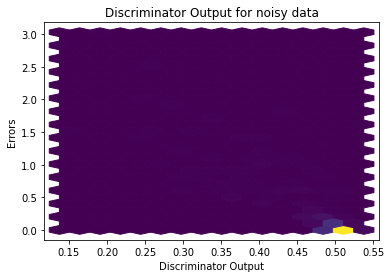

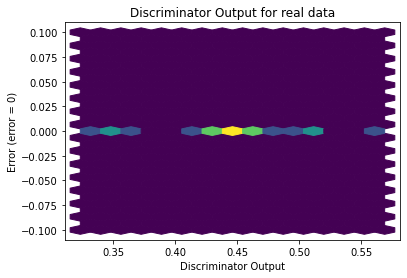

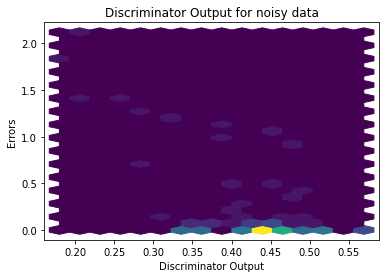

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1172]], device='cuda:0', requires_grad=True)
